In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [127]:
data = pd.read_csv("winequality-red.csv")

In [128]:
data.shape

(1599, 12)

In [129]:
column = data.columns

In [130]:
column

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [131]:
# The dataset shows the ranking of the quality of the dataset from 0-10 0 being the lowest and 10 being the highest

In [132]:
data["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [133]:
# Three classes low medium and high
# 0-3 -> 0
# 4-6 -> 1
# 7-10 2

In [218]:
ranges = [0, 4, 6, 10]
labels = [0, 1, 2]

In [219]:
data['quality_label'] = np.select(
    [data['quality'].between(ranges[i], ranges[i+1], inclusive='right') for i in range(len(labels))],
    labels,
    default=''
)

In [220]:
df_y = data["quality_label"]

In [221]:
df_y

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality_label, Length: 1599, dtype: object

In [222]:
df_y.value_counts()

quality_label
1    1319
2     217
0      63
Name: count, dtype: int64

In [223]:
df_y.shape

(1599,)

In [224]:
df_y = df_y.values.reshape(-1, 1)

In [225]:
data["quality_label"].value_counts()

quality_label
1    1319
2     217
0      63
Name: count, dtype: int64

In [226]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


<BarContainer object of 1599 artists>

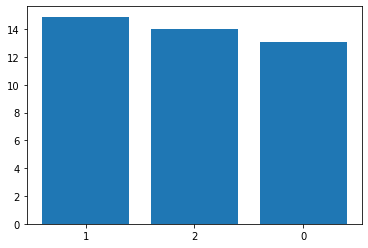

In [227]:
plt.bar(data["quality_label"], data["alcohol"])
# plt.bar(data["quality"], data["alcohol"])

In [228]:
df_y.shape

(1599, 1)

In [229]:
df_x = data.drop(columns=["quality", "quality_label"])
# df_x = data.drop(columns=["quality"])

In [230]:
# Entropy
from sklearn.tree import DecisionTreeClassifier

In [231]:
classifier = DecisionTreeClassifier(criterion="entropy")

In [232]:
from sklearn.model_selection import train_test_split

In [273]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=1/3, random_state=20)

In [275]:
train_y

array([['1'],
       ['1'],
       ['1'],
       ...,
       ['1'],
       ['1'],
       ['1']], dtype=object)

In [244]:
train_y = train_y.astype(int)
test_y = test_y.astype(int)

In [245]:
train_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1586,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4
239,8.2,1.000,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
599,12.7,0.590,0.45,2.3,0.082,11.0,22.0,1.00000,3.00,0.70,9.3
802,5.1,0.585,0.00,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.9
...,...,...,...,...,...,...,...,...,...,...,...
924,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.2
1247,7.4,0.550,0.19,1.8,0.082,15.0,34.0,0.99655,3.49,0.68,10.5
271,11.5,0.180,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1
474,10.5,0.280,0.51,1.7,0.080,10.0,24.0,0.99820,3.20,0.89,9.4


In [246]:
test_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1508,7.1,0.270,0.60,2.1,0.074,17.0,25.0,0.99814,3.38,0.72,10.6
718,8.4,0.560,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6
1370,8.7,0.780,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2
579,10.6,0.310,0.49,2.2,0.063,18.0,40.0,0.99760,3.14,0.51,9.8
498,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0
...,...,...,...,...,...,...,...,...,...,...,...
1314,7.0,0.360,0.21,2.4,0.086,24.0,69.0,0.99556,3.40,0.53,10.1
90,7.9,0.520,0.26,1.9,0.079,42.0,140.0,0.99640,3.23,0.54,9.5
1306,9.7,0.690,0.32,2.5,0.088,22.0,91.0,0.99790,3.29,0.62,10.1
1557,6.6,0.855,0.02,2.4,0.062,15.0,23.0,0.99627,3.54,0.60,11.0


In [252]:
train_y.shape

(1066, 1)

In [253]:
classifier = classifier.fit(train_x, train_y)

In [254]:
y_pred = classifier.predict(test_x)

In [255]:
type(y_pred[1])

numpy.int32

In [256]:
from sklearn.metrics import classification_report, accuracy_score

In [257]:
print(accuracy_score(test_y, y_pred))

0.8105065666041276


In [258]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)

In [259]:
import seaborn as sns

In [260]:
cm

array([[  4,  11,   0],
       [ 22, 392,  37],
       [  0,  31,  36]], dtype=int64)

<AxesSubplot:>

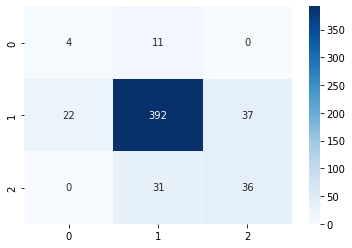

In [261]:
sns.heatmap(cm, annot=True, fmt="", cmap='Blues')

In [262]:
from sklearn.metrics import classification_report, accuracy_score

In [263]:
report1 = classification_report(y_pred, test_y)

In [264]:
print(report1)

              precision    recall  f1-score   support

           0       0.27      0.15      0.20        26
           1       0.87      0.90      0.89       434
           2       0.54      0.49      0.51        73

    accuracy                           0.81       533
   macro avg       0.56      0.52      0.53       533
weighted avg       0.79      0.81      0.80       533



[Text(0.4590887404580153, 0.9642857142857143, 'x[10] <= 10.525\nentropy = 0.841\nsamples = 1066\nvalue = [48, 868, 150]'),
 Text(0.21421755725190839, 0.8928571428571429, 'x[1] <= 0.605\nentropy = 0.51\nsamples = 648\nvalue = [31, 592, 25]'),
 Text(0.09732824427480916, 0.8214285714285714, 'x[10] <= 9.65\nentropy = 0.429\nsamples = 405\nvalue = [7, 376, 22]'),
 Text(0.04961832061068702, 0.75, 'x[0] <= 14.15\nentropy = 0.246\nsamples = 203\nvalue = [5, 196, 2]'),
 Text(0.04198473282442748, 0.6785714285714286, 'x[2] <= 0.035\nentropy = 0.212\nsamples = 202\nvalue = [5, 196, 1]'),
 Text(0.015267175572519083, 0.6071428571428571, 'x[10] <= 9.1\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.007633587786259542, 0.5357142857142857, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.022900763358778626, 0.5357142857142857, 'x[7] <= 0.997\nentropy = 0.65\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.015267175572519083, 0.4642857142857143, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4,

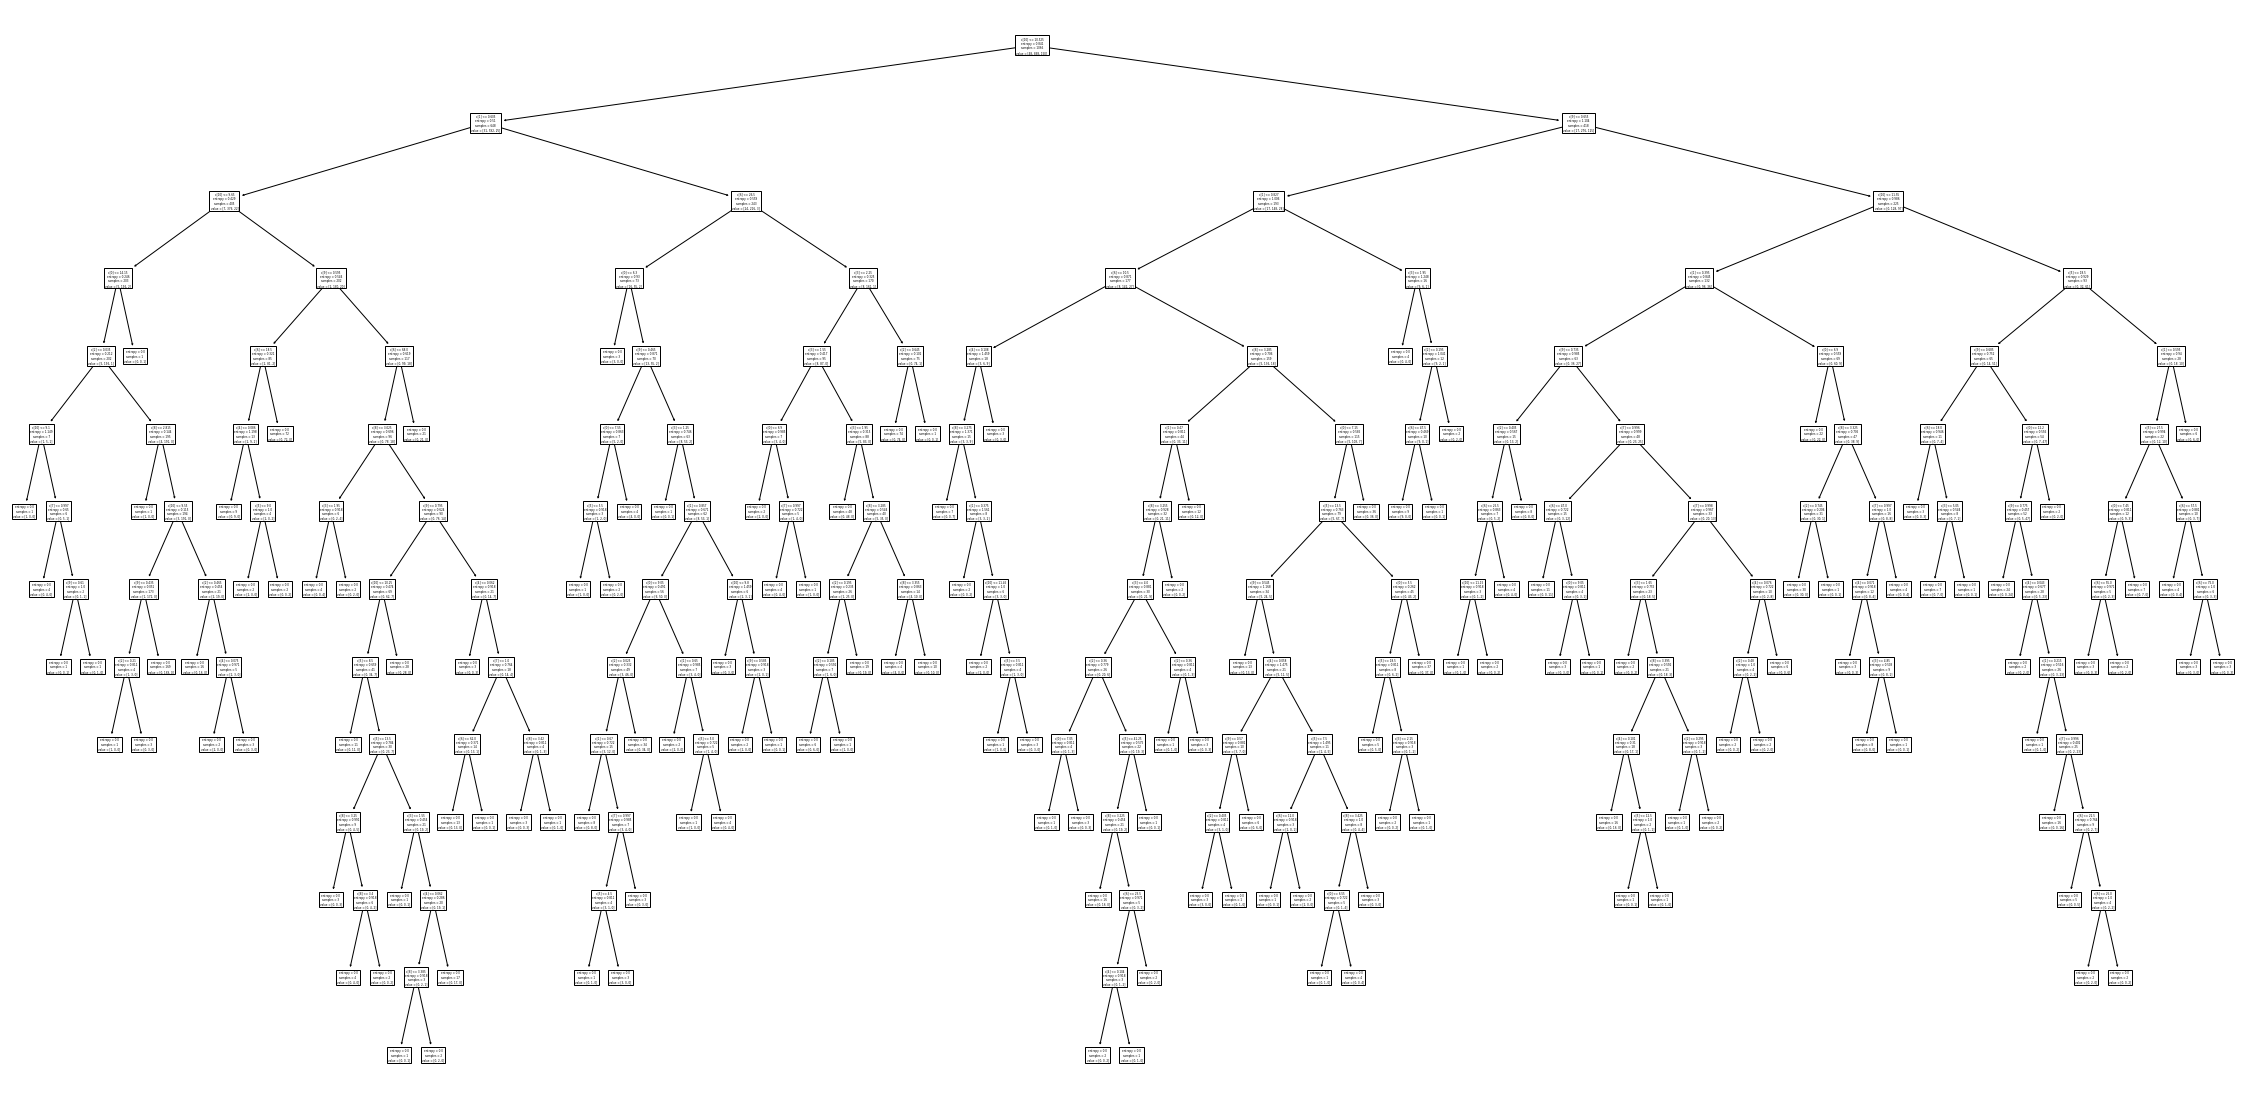

In [265]:
from sklearn import tree
plt.figure(figsize=(40,20))
tree.plot_tree(classifier)

In [266]:
from sklearn.model_selection import cross_val_score

In [267]:
scores = cross_val_score(classifier, df_x, df_y, cv=5)

In [268]:
scores.mean()

0.7392123824451411

In [269]:
y_pred_train = classifier.predict(train_x)
accuracy_score(train_y, y_pred_train)

1.0

In [270]:
import dtreeviz

In [271]:
viz_model = dtreeviz.model(classifier, df_x, df_y)

In [277]:
df_y.shape

(1599, 1)

In [272]:
viz_model.view()

ValueError: y_train must a one-dimensional list or Pandas Series, got: (1599, 1)